## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Для составления аналитического обзора по проблеме безработицы в России необходимо провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

## <a class="anchor" id="1"></a> Загрузка данных. Предобработка

In [1]:
#згружаем наш детасет
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('unemployed.csv', sep=';', low_memory=False)
df.head(4)

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1


In [2]:
df.info() #смотрим обшую информацию по файлу 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   district           object
 2   region             object
 3   month_application  object
 4   changed_value      bool  
 5   age                object
 6   gender             object
 7   education          object
 8   hc_repeat          bool  
 9   hc_didnotwork      bool  
 10  find_new_job       bool  
 11  count              int64 
dtypes: bool(4), int64(2), object(6)
memory usage: 281.9+ MB


In [2]:
df.isna().sum() #найдем количество пропусков

id                   0
district             0
region               0
month_application    0
changed_value        0
age                  0
gender               0
education            0
hc_repeat            0
hc_didnotwork        0
find_new_job         0
count                0
dtype: int64

Проверим детально по столбцам 

In [4]:
df['education'].unique()

array(['4', '2', '1', '3', '6', '9', 'None'], dtype=object)

In [3]:
#заменим None на 0, согласно описанию столбца
df['education'] = df['education'].replace({'None':'0'}, regex=True)

In [4]:
#проверка
df['education'].unique()

array(['4', '2', '1', '3', '6', '9', '0'], dtype=object)

In [5]:
df['gender'].unique()

array(['0', '1', 'None'], dtype=object)

In [6]:
df.duplicated().sum()

0

In [2]:
#изменим тип данных на время
df['month_application'] = pd.to_datetime(df['month_application'], format='%Y-%m')

In [3]:
#добавим столбцы с годом и месяцем
df['month'] = df['month_application'].dt.month
df['year'] = df['month_application'].dt.year
df.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month,year
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,52-57,0,4,True,False,False,1,1,2017
1,256,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,22-27,1,4,True,False,False,1,1,2017
2,711,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,34-39,1,4,True,False,True,1,1,2017
3,799,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,0,4,False,False,False,1,1,2017
4,861,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,1,2,True,False,False,2,1,2017


In [4]:
#для притяной визуализации графиков изменим тип данных в столбце с годом
df['year'] = df['year'].astype('str')

### Выводы:

1. Детасет состоит из 4 347 416 строк и 12 столбцов
2. Столбцы были проверены на налицие пропусков: заменили None на 0, согласно описанию столбца education, в столбце month_application именили тип данных
3. Добавили столбцы с годом и месяцем


###  <a class="anchor" id="1"></a> Исследовательский анализ данных

### 1. Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.

In [10]:
#создадим сводную таблицу, где сгруппируем число обращений по годам
df_year = df.pivot_table(index='year', aggfunc='sum',values='count').sort_values (by = 'year', ascending=True).reset_index()
df_year.columns=['year', 'count']
df_year

,year,count
0,2017,1636952
1,2018,1486267
2,2019,1708624
3,2020,5358371


In [9]:
sns.set_theme(style="whitegrid", palette="flare")

In [10]:
plt.rcParams['figure.figsize'] = (10, 5)

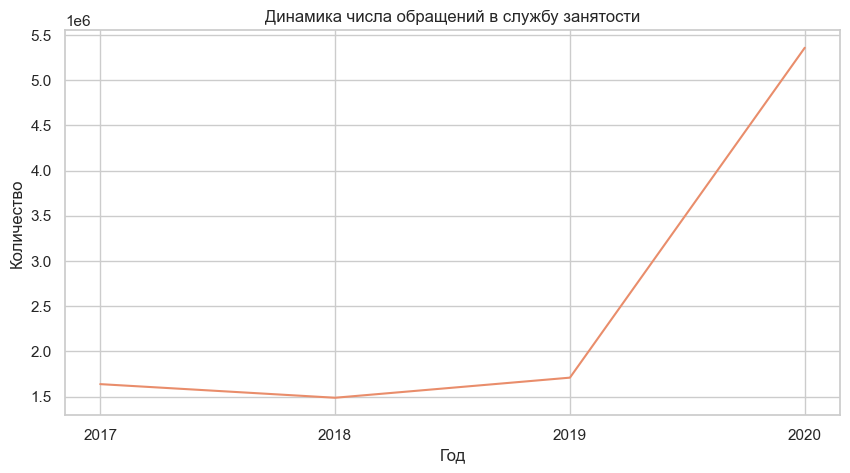

In [13]:
sns.lineplot(data=df_year, x='year', y='count').set(title='Динамика числа обращений в службу занятости',
                                                                 xlabel='Год', 
                                                                 ylabel='Количество'
                                                                 )
plt.show()

Как можно заметить, с 2019 года резко возросло число обращений в  службы занятости у населения.

In [14]:
#создадим сводную таблицу, где сгруппируем число обращений по годам и месяцам (укрупним по годам)
df_month_year = df.pivot_table(index=['year', 'month'], aggfunc='sum',values='count').sort_values (by = ['year', 'month'], ascending=[True, True])
df_month_year

count
year month         
2017 1       155747
     2       146347
     3       156272
     4       138043
     5       148049
     6       118358
     7       119418
     8       117018
     9       120229
     10      139510
     11      159033
     12      118928
2018 1       144757
     2       129714
     3       125032
     4       127287
     5       131586
     6       101010
     7       114215
     8       109465
     9       114198
     10      138405
     11      142766
     12      107832
2019 1       181068
     2       160681
     3       145769
     4       156697
     5       143756
     6       115781
     7       137006
     8       120735
     9       127809
     10      149610
     11      149604
     12      120108
2020 1       161713
     2       149366
     3       154166
     4      1020329
     5       797833
     6       775579
     7       657621
     8       538155
     9       417303
     10      372164
     11      277431
     12       36711

<AxesSubplot:title={'center':'Динамика числа обращений в службу занятости'}, xlabel='Год, месяц', ylabel='Количество'>

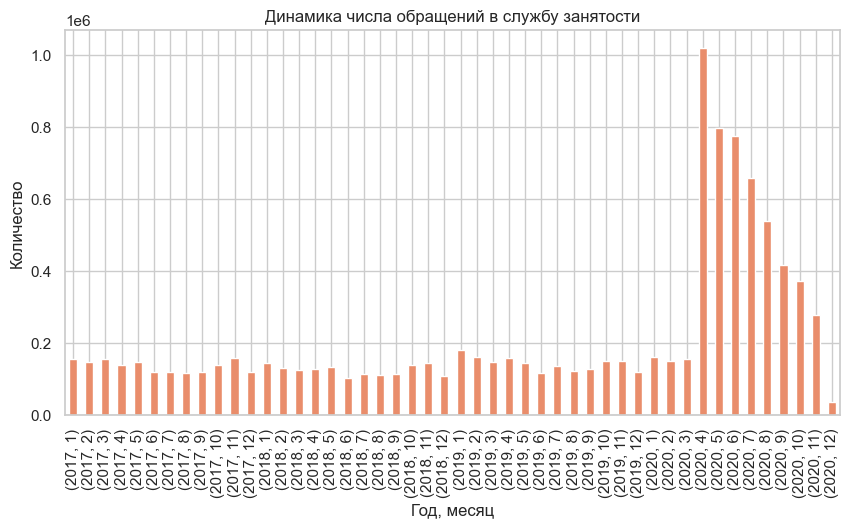

In [15]:
df_month_year.plot(kind='bar', title='Динамика числа обращений в службу занятости', ylabel='Количество', xlabel='Год, месяц', legend=False)

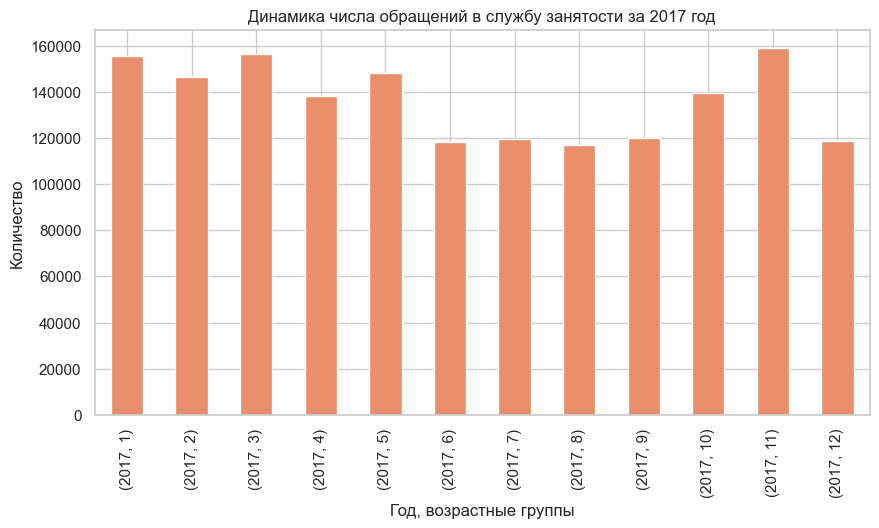

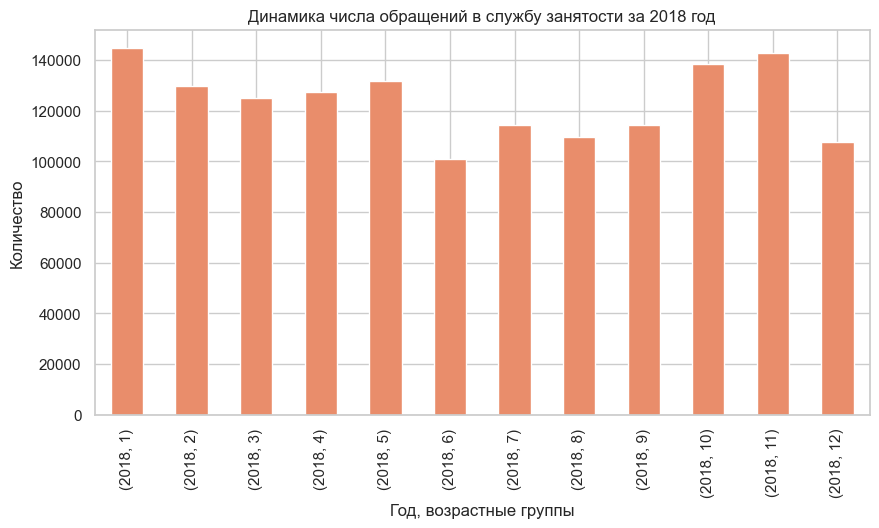

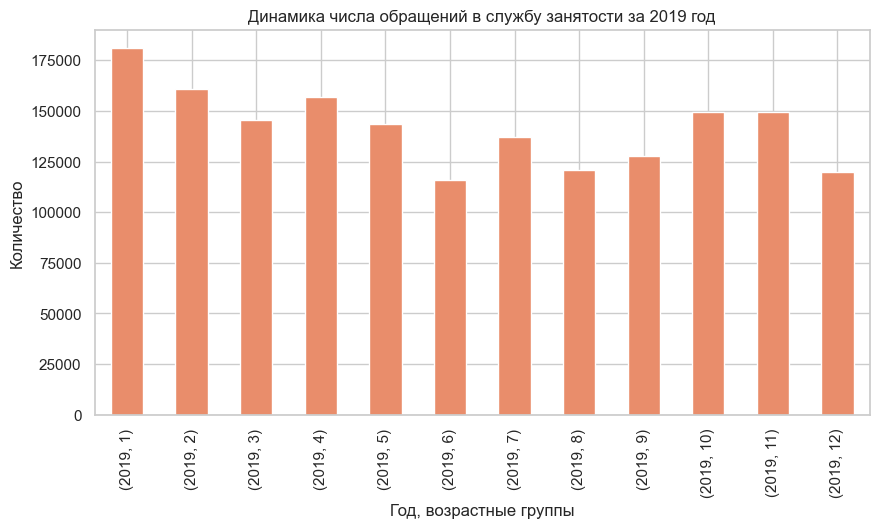

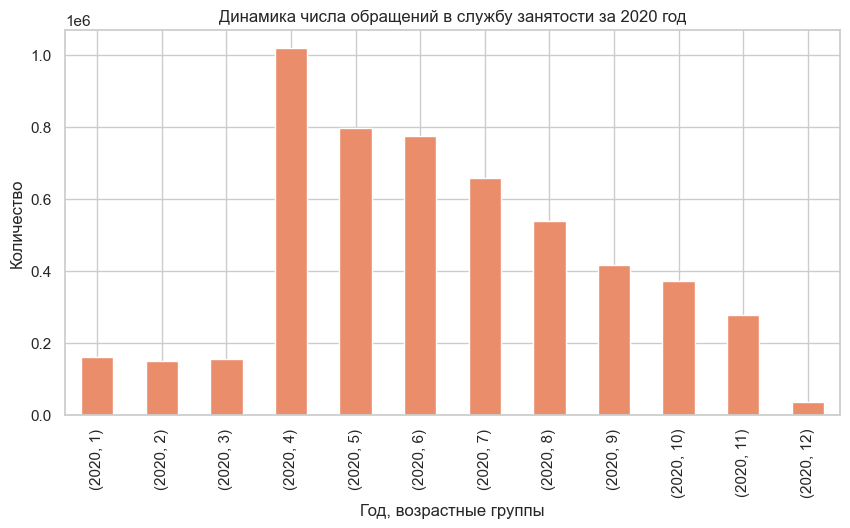

In [16]:
#построим графики по каждому году
list_year = ['2017', '2018', '2019', '2020']
for i in list_year:
    df_year_1 = df_month_year.query('year==@i')
    df_year_1
    df_year_1.plot(kind='bar', title=f'Динамика числа обращений в службу занятости за {i} год', ylabel='Количество', xlabel='Год, возрастные группы', legend=False)
    plt.show()

Можно заметить, что основной пик обращений пришелся на апрель 2020 года, за год ситуация с числом обращений начала постепенно улучшаться. Такой резкий скачок мог быть обусловлен активным сокращением числа рабочих мест в период пандемии, что стало поводом для обращения большого количества граждан в службы занятости. 

In [17]:
#создадим срез детасета, где были повторные обращения
df_year_dop = df.query('hc_repeat == True')
#создадим сводную таблицу, где сгруппируем число повторных обращений по годам
df_year_dop = df_year_dop.pivot_table(index='year', aggfunc='sum', values='count').sort_values(by='year', ascending=True).reset_index()
#добвим в сводную таблицу столбец из прошлой таблицы - count 
df_year_dop['count_1'] = df_year['count']
df_year_dop

,year,count,count_1
0,2017,860704,1636952
1,2018,796278,1486267
2,2019,912458,1708624
3,2020,1945860,5358371


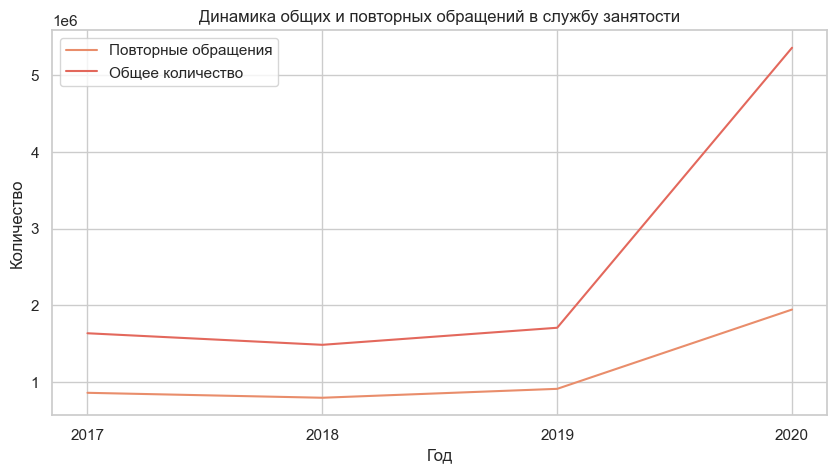

In [18]:
sns.lineplot(data=df_year_dop, x='year', y='count', label= 'Повторные обращения')
(sns.lineplot(data=df_year_dop, x='year', y='count_1', label= 'Общее количество')
.set(title='Динамика общих и повторных обращений в службу занятости', xlabel='Год', ylabel='Количество'))

plt.show()

По графику, можно судить  динамика роста повторных обращений в основном повторяет динамику общеего количесства обращений, но, очевидно, что уровень первичных обращений куда выше повторных. 

### 2. Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.<br> *2.1 Детализируйте по каждому году, визуализируйте результат.

In [19]:
#создадим сводную таблицу, где сгруппируем число обращений по возрастным группам
df_age = df.pivot_table(index='age', aggfunc='sum',values='count').sort_values (by = 'age', ascending=True).reset_index()
df_age.columns=['age', 'count']
df_age

,age,count
0,16-21,642896
1,22-27,1314198
2,28-33,2001623
3,34-39,1963618
4,40-45,1580492
5,46-51,1325804
6,52-57,1066380
7,58-60,295203


<AxesSubplot:title={'center':'Число обращений в службу занятости по возрастным группам'}, xlabel='Возрастные группы', ylabel='Количество'>

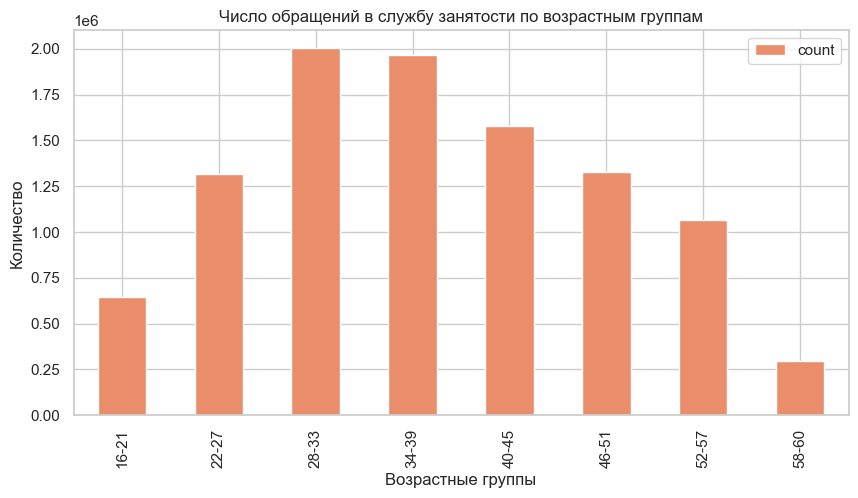

In [20]:
#построим столбчатую диаграмму 
df_age.plot(kind='bar', x='age', y='count', title='Число обращений в службу занятости по возрастным группам', ylabel='Количество', xlabel='Возрастные группы')

По диаграмме видно, что основные обращения в службы занятости поступают от граждан молодого возраста (28-33 и 34-39 лет)

In [21]:
#создадим сводную таблицу, где сгруппируем число обращений по возрастным группам и по годам 
df_age_year = df.pivot_table(index=['year', 'age'], aggfunc='sum',values='count').sort_values (by = ['year', 'age'], ascending=[True, True])
df_age_year

count
year age           
2017 16-21   122823
     22-27   202814
     28-33   276401
     34-39   277531
     40-45   252923
     46-51   235754
     52-57   218311
     58-60    50395
2018 16-21   101361
     22-27   159944
     28-33   245414
     34-39   261582
     40-45   242501
     46-51   224407
     52-57   199209
     58-60    51849
2019 16-21   100517
     22-27   170986
     28-33   289323
     34-39   309486
     40-45   279276
     46-51   255398
     52-57   229193
     58-60    74445
2020 16-21   318195
     22-27   780454
     28-33  1190485
     34-39  1115019
     40-45   805792
     46-51   610245
     52-57   419667
     58-60   118514

<AxesSubplot:title={'center':'Число обращений в службу занятости по возрастным группам по годам'}, xlabel='Год, возрастные группы', ylabel='Количество'>

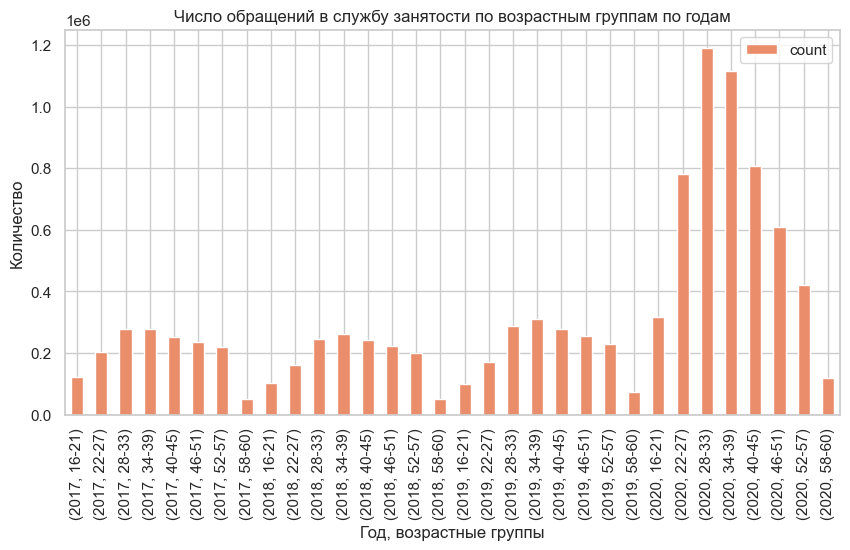

In [22]:
df_age_year.plot(kind='bar', title='Число обращений в службу занятости по возрастным группам по годам', ylabel='Количество', xlabel='Год, возрастные группы')

Как уже было отмечено, пик обращений пришелся на 2020 год и сформировался в основном за счет личных дел молодых людей

Детализация по возрастным группам и годам показала, что именно на 2020 год пришелся пик обращений от возрастных групп 28-33 и 34-39, хотя раньше, количество обращений из этих групп было примерно одинаковым. 

### 3. Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.

In [5]:
#создадим срез детасета, где люди нашли работу 
df_find = df.query('find_new_job == True')
#создадим сводную таблицу, где сгруппируем число нашедших работу по годам
df_find = df_find.pivot_table(index='year', aggfunc='sum', values='count').sort_values(by='year', ascending=True).reset_index()
df_find

,year,count
0,2017,875769
1,2018,789671
2,2019,813881
3,2020,1097348


In [7]:
#посчитаем общее количество устроившихся 
count_find = df.query('find_new_job == True')['count'].sum()
all_count = df['count'].sum()
#посчитаем процент устроиства по всему детасету
perc = round((count_find / all_count) * 100, 2)
print('Процент трудоустройства по всему датасету:', perc)

Процент трудоустройства по всему датасету: 35.1


<AxesSubplot:title={'center':'Число устроившихся на работу граждан'}, ylabel='Год'>

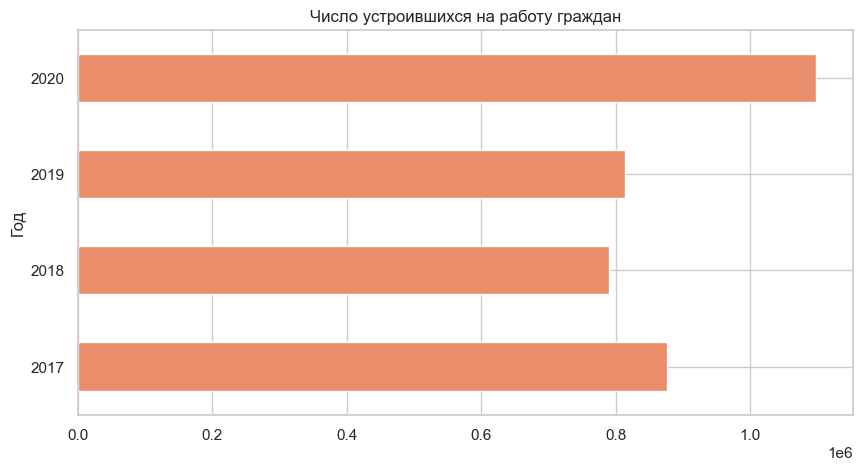

In [11]:
df_find.plot(kind='barh', x ='year', title='Число устроившихся на работу граждан', ylabel='Количество', xlabel='Год', legend=False)

Число устроившихся на работу обращались за помощью в 2020 году и их больше всего среди тех, кто нашел место работы.

<AxesSubplot:title={'center':'Соотношение людей, нашедших работу, и безработных'}, xlabel='find_new_job'>

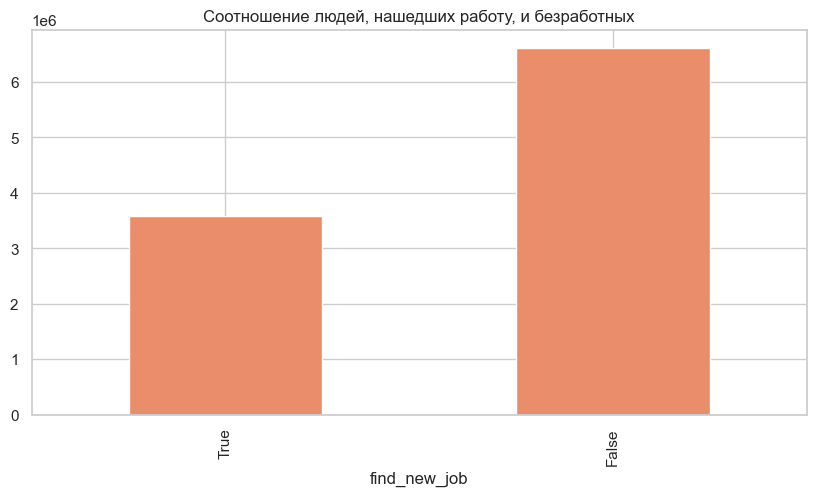

In [27]:
df.pivot_table(index='find_new_job', aggfunc='sum', values='count').sort_values(by ='count', ascending=True).plot(kind='bar', title='Соотношение людей, нашедших работу, и безработных', legend=False)

Таким образом, большинство людей, обратившихся за помощью в службы занятости так и не нашли работу. 

### 4. Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.<br>*4.1 Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.

In [28]:
#создадим срез детасета, где люди нашли работу 
df_find = df.query('find_new_job == True')
#создадим сводную таблицу, где сгруппируем число нашедших работу по годам
df_find = df_find.pivot_table(index='year', aggfunc='sum', values='count').sort_values(by='year', ascending=True).reset_index()
df_find

,year,count
0,2017,875769
1,2018,789671
2,2019,813881
3,2020,1097348


In [29]:
#создадим срез детасета, где люди не нашли работу 
df_findnot = df.query('find_new_job == False')
#создадим сводную таблицу, где сгруппируем число нашедших работу по годам
df_findnot = df_findnot.pivot_table(index='year', aggfunc='sum', values='count').sort_values(by='year', ascending=True).reset_index()
df_findnot.columns = ['year', 'Не нашли работу']
df_findnot['Нашли работу'] = df_find['count']
df_findnot

,year,Не нашли работу,Нашли работу
0,2017,761183,875769
1,2018,696596,789671
2,2019,894743,813881
3,2020,4261023,1097348


<AxesSubplot:title={'center':'Число устроившихся на работу граждан'}, ylabel='Год'>

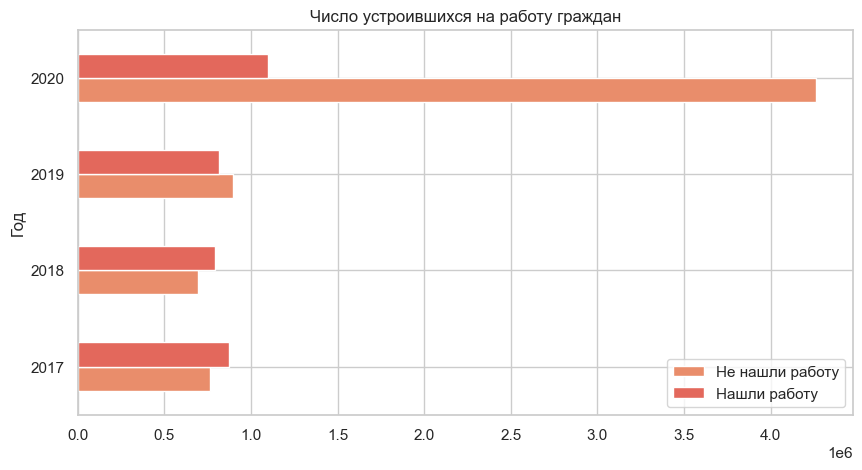

In [30]:
df_findnot.plot(kind='barh', x ='year', title='Число устроившихся на работу граждан', ylabel='Количество', xlabel='Год')

Особый разрыв в абсолютном соотношении устроившихся и не устроившихся наблюдается в 2020 году, до этого эти показатели плюс-минус были похожи друг на друга. 

In [31]:
un_em = df.pivot_table(index=['year', 'find_new_job'],aggfunc='sum', values='count')
un_em

count
year find_new_job         
2017 False          761183
     True           875769
2018 False          696596
     True           789671
2019 False          894743
     True           813881
2020 False         4261023
     True          1097348

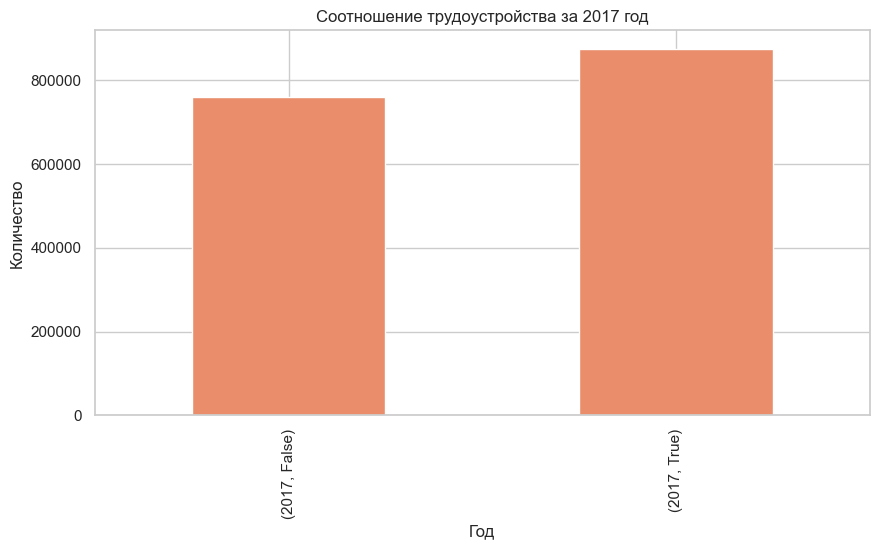

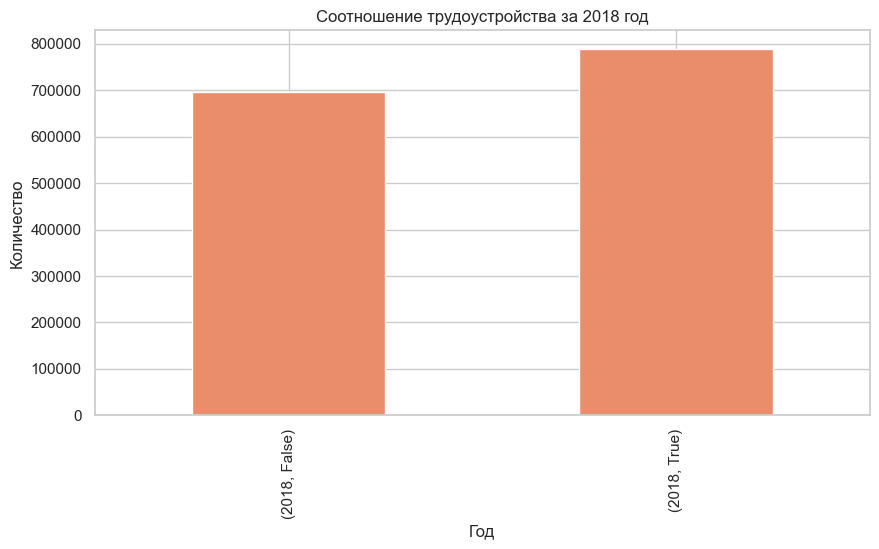

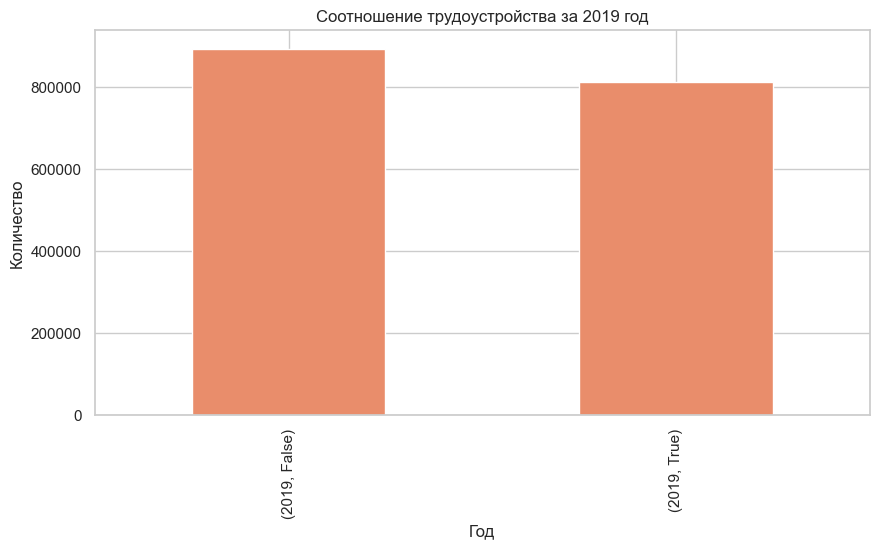

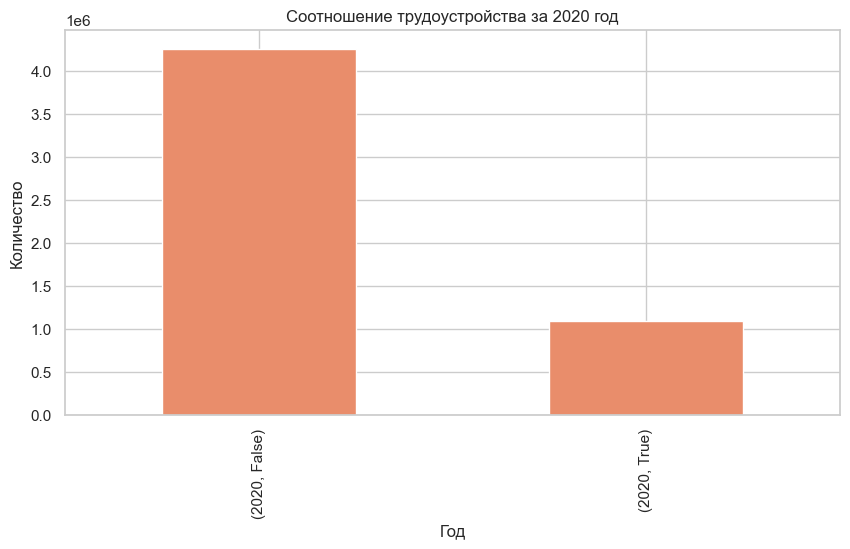

In [32]:
#построим графики по каждому году
list_year = ['2017', '2018', '2019', '2020']
for i in list_year:
    df_un_em = un_em.query('year==@i')
    df_un_em
    df_un_em.plot(kind='bar', title=f'Соотношение трудоустройства за {i} год', ylabel='Количество', xlabel='Год', legend=False)
    plt.show()

In [33]:
#создадим датафрейм с числом обращений по годам
list_2 = []
for i in df_find['year']:
    a = df.query('year == @i')['count'].sum()
    list_2.append(a)
df_find['all_job'] = list_2
df_find

,year,count,all_job
0,2017,875769,1636952
1,2018,789671,1486267
2,2019,813881,1708624
3,2020,1097348,5358371


In [34]:
# добавим  отношение утсроившихся к общему числу 
df_find['perc_find_new_job'] = round((df_find['count'] / df_find['all_job']) * 100, 2)
df_find

,year,count,all_job,perc_find_new_job
0,2017,875769,1636952,53.50
1,2018,789671,1486267,53.13
2,2019,813881,1708624,47.63
3,2020,1097348,5358371,20.48


<AxesSubplot:title={'center':'Динамика доли устроившихся на работу граждан'}, xlabel='Год', ylabel='Процент (%)'>

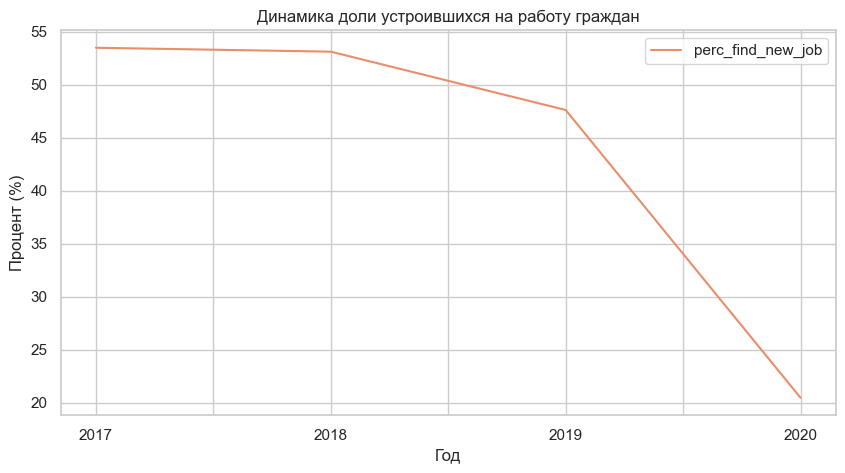

In [35]:
df_find.plot(x ='year', y='perc_find_new_job', title='Динамика доли устроившихся на работу граждан', ylabel='Процент (%)', xlabel='Год')

Как уже было сказано, к 2020 году динамика доли устроившихся значительно сократилась до 20,48 %, если раньше это соотношение было примерно равно 50%

### 5. Осуществите категоризацию по столбцам <code>gender</code> и <code>education</code> в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования.

In [36]:
gender_dict = {'1' : 'мужской',
              '0' : 'женский'}

In [37]:
education_dict = {'1' : 'начальное общее образование',
                   '2' : 'основное общее образование',
                   '3' : 'среднее общее образование',
                   '4' : 'среднее профессиональное образование',
                   '6' : 'высшее образование',
                   '9' : 'другое',
                   '0' : 'нет данных'}

In [38]:
df['gender_group'] = df['gender'].map(gender_dict)


In [39]:
df['education_group'] = df['education'].map(education_dict)
df.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month,year,gender_group,education_group
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,52-57,0,4,True,False,False,1,1,2017,женский,среднее профессиональное образование
1,256,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,22-27,1,4,True,False,False,1,1,2017,мужской,среднее профессиональное образование
2,711,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,34-39,1,4,True,False,True,1,1,2017,мужской,среднее профессиональное образование
3,799,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,0,4,False,False,False,1,1,2017,женский,среднее профессиональное образование
4,861,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,1,2,True,False,False,2,1,2017,мужской,основное общее образование


In [40]:
df_gender = df.pivot_table(index='gender_group', aggfunc='sum', values='count').reset_index()
df_gender

,gender_group,count
0,женский,5585350
1,мужской,4604856


Число обращений от женщин больше числа обращений мужчин

In [41]:
df_education = df.pivot_table(index='education_group', aggfunc='sum', values='count').sort_values(by='count', ascending=False).reset_index()
df_education

,education_group,count
0,среднее профессиональное образование,2555969
1,среднее общее образование,2174288
2,нет данных,2138103
3,высшее образование,1561037
4,основное общее образование,1431099
5,другое,321852
6,начальное общее образование,7866


В соновном в службы занятости обращаются люди с средним профессиональным образованием

In [42]:
#создадим срез детасета, где люди ранее не работали
df_didntwork = df.query('hc_didnotwork == True')
#создадим сводную таблицу, где сгруппируем число ранее не работавших по образованию
df_didntwork = df_didntwork.pivot_table(index='education_group', aggfunc='sum', values='count').sort_values(by='count', ascending=False).reset_index()
df_didntwork

,education_group,count
0,среднее общее образование,540559
1,основное общее образование,387410
2,среднее профессиональное образование,356212
3,высшее образование,144917
4,другое,120817
5,нет данных,84118
6,начальное общее образование,1556


Из не работавшх ранее граждан чаще обращаются люди с средним общим образованием 

In [43]:
#создадим срез детасета, где люди нашли работу после обращения в службу занятости 
df_find_didnt = df.query('find_new_job == True & hc_didnotwork == True')
#создадим сводную таблицу, где сгруппируем число нашедших работу по годам
df_find_didnt = df_find_didnt.pivot_table(index='education_group', aggfunc='sum', values='count').sort_values(by='count', ascending=False).reset_index()
df_find_didnt

,education_group,count
0,среднее профессиональное образование,99138
1,среднее общее образование,78082
2,основное общее образование,75145
3,высшее образование,36236
4,другое,17063
5,нет данных,11526
6,начальное общее образование,231


Из не работавших ранее и нашедших работу после обращения в большинстве были люди с средним профессиональным образованием

In [44]:
#посчитаем уровень трудоустройства
df_find_didnt['employment'] = round((df_find_didnt['count'] / df_didntwork['count']) * 100, 2)
df_find_didnt

,education_group,count,employment
0,среднее профессиональное образование,99138,18.34
1,среднее общее образование,78082,20.15
2,основное общее образование,75145,21.10
3,высшее образование,36236,25.00
4,другое,17063,14.12
5,нет данных,11526,13.70
6,начальное общее образование,231,14.85


Как видно, наибольший процент трудоустройства у людей с высшим образованием (25%)

### 6. Исследуйте безработицу в России отдельно за 2020 год (за исключением декабря 2020). Создайте срез данных.<br>6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.<br>6.2 Определите процент трудоустройства по гендерной принадлежности<br>6.3 Определите число обращений в службу занятости по федеральным округам.<br>6.4 Определите разброс числа объявлений по регионам с помощью boxplot.<br>6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.<br>***6.6 Определите процент трудоустройства по федеральным округам.<br>***6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле<br>

In [45]:
#создадим срез детасета без декабря 2020
df_2020 = df.query('month_application != "2020-12" & year == "2020"')

In [46]:
#создадим срез детасета, где люди нашли работу 
df_find_2020 = df_2020.query('find_new_job == True')
#создадим сводную таблицу, где сгруппируем число нашедших работу по месяцам 
df_find_2020 = df_find_2020.pivot_table(index='month', aggfunc='sum', values='count').sort_values(by='month', ascending=True).reset_index()
df_find_2020

,month,count
0,1,63615
1,2,53040
2,3,49817
3,4,299564
4,5,220721
5,6,153530
6,7,112190
7,8,73088
8,9,43106
9,10,22461


In [47]:
#найдем общее количество безработных по месяцам за 2020
df_2020_all = df_2020.pivot_table(index='month', aggfunc='sum', values='count').sort_values(by='month', ascending=True).reset_index()
df_2020_all

,month,count
0,1,161713
1,2,149366
2,3,154166
3,4,1020329
4,5,797833
5,6,775579
6,7,657621
7,8,538155
8,9,417303
9,10,372164


In [48]:
#добавим столбец для рисунка
df_find_2020['unemployment'] = df_2020_all['count']
df_find_2020

,month,count,unemployment
0,1,63615,161713
1,2,53040,149366
2,3,49817,154166
3,4,299564,1020329
4,5,220721,797833
5,6,153530,775579
6,7,112190,657621
7,8,73088,538155
8,9,43106,417303
9,10,22461,372164


<AxesSubplot:title={'center':'Динамика числа безработных и нашедших работу за 2020 год по месяцам'}, xlabel='Месяц', ylabel='Количество'>

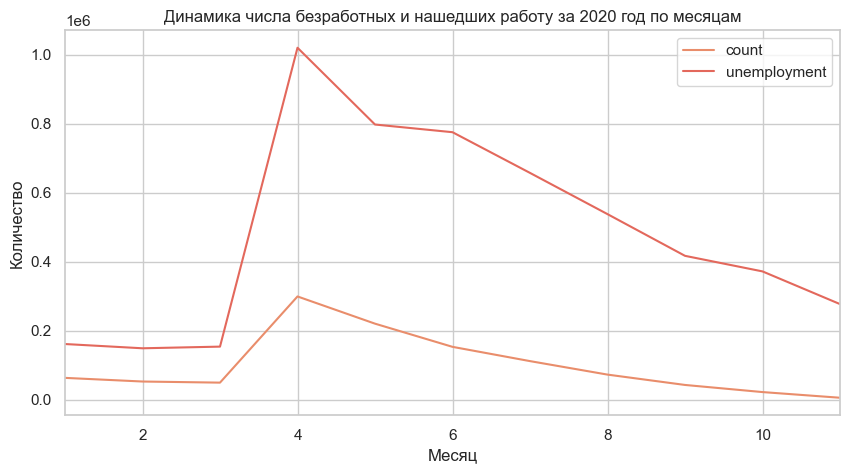

In [49]:
df_find_2020.plot(x ='month', title='Динамика числа безработных и нашедших работу за 2020 год по месяцам', ylabel='Количество', xlabel='Месяц', xlim=(1,11))

За 2020 год динамика числа людей, обратившихся в службы занятости, была значительно выше устройства на работу

In [50]:
#6.2
#посчитаем сколько женщин нашли работу после обращения в службу занятости 
df_women = df_2020.query('find_new_job == True & gender_group == "женский"')['count'].sum()
#посчитаем сколько мужчин нашли работу после обращения в службу занятости 
df_man = df_2020.query('find_new_job == True & gender_group == "мужской"')['count'].sum()
#посчитаем сколько женщин обралитились в службу занятости 
df_women_all = df_2020.query('gender_group == "женский"')['count'].sum()
#посчитаем сколько мужчин обралитились в службу занятости 
df_man_all = df_2020.query('gender_group == "мужской"')['count'].sum()
perc_women = round((df_women / df_women_all) * 100, 2)
perc_man = round((df_man / df_man_all) * 100, 2)
print('Процент трудоустройтсва у женщин:', perc_women)
print('Процент трудоустройтсва у мужчин:', perc_man)

Процент трудоустройтсва у женщин: 19.8
Процент трудоустройтсва у мужчин: 21.71


In [51]:
#6.3
df_dist = df_2020.pivot_table(index='district', aggfunc='sum', values='count').sort_values(by='count', ascending=True).reset_index()
df_dist

,district,count
0,Дальневосточный федеральный округ,289224
1,Уральский федеральный округ,461223
2,Северо-Западный федеральный округ,477798
3,Южный федеральный округ,595894
4,Северо-Кавказский федеральный округ,701329
5,Сибирский федеральный округ,718075
6,Центральный федеральный округ,1029581
7,Приволжский федеральный округ,1048536


<AxesSubplot:title={'center':'Число обращений по округам'}, ylabel='Округ'>

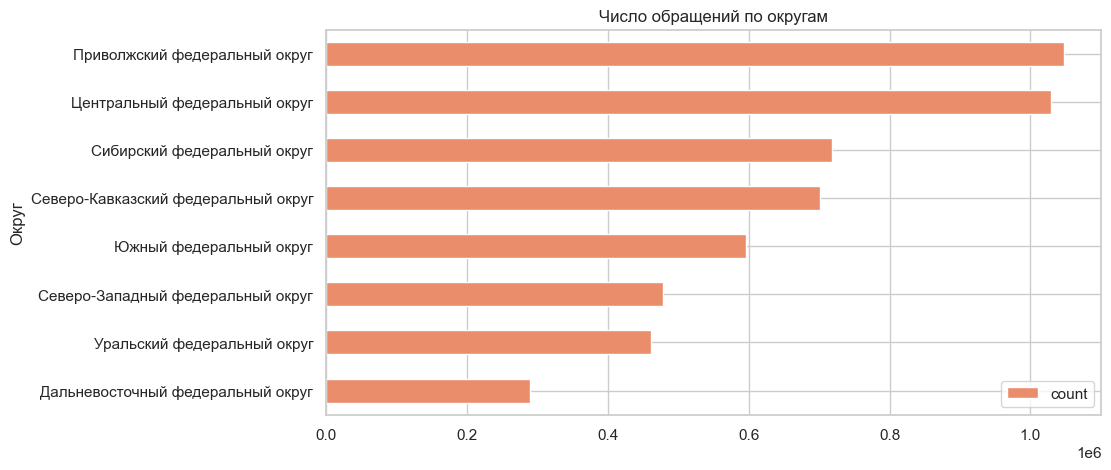

In [52]:
df_dist.plot(kind='barh', x='district', title='Число обращений по округам', ylabel='Количество', xlabel='Округ')

Как можно заметить по графику, чаще всего обращения поступали в Приволжском и Центральном федеральных округах, реже всего в Дальневосточном. 

In [53]:
#6.4
df_reg = df_2020.pivot_table(index='region', aggfunc='sum', values='count').sort_values(by='count', ascending=False).reset_index()
df_reg

,region,count
0,г. Москва,296258
1,Чеченская Республика,224277
2,Московская область,210040
3,Краснодарский край,198111
4,Республика Башкортостан,185516
...,...,...
80,Сахалинская область,6431
81,г. Севастополь,5997
82,Магаданская область,3554
83,Ненецкий автономный округ,1877


<AxesSubplot:>

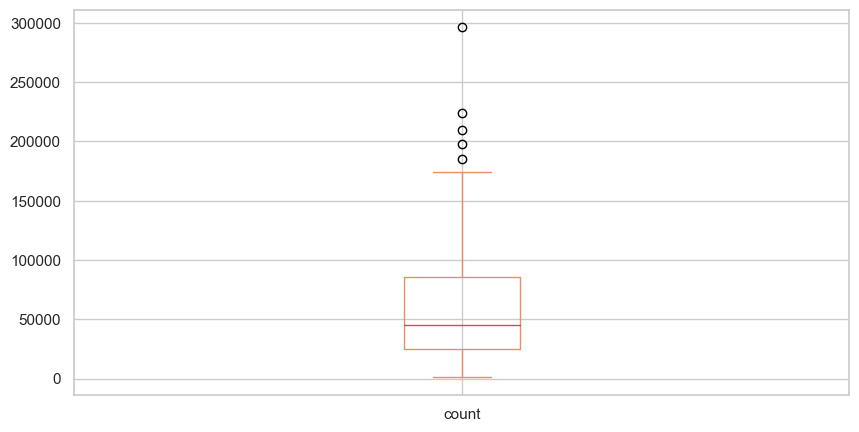

In [55]:
df_reg['count'].plot(kind='box')

In [56]:
df_reg['count'].describe()

count        85.000000
mean      62607.764706
std       57417.455240
min        1227.000000
25%       24901.000000
50%       45430.000000
75%       85686.000000
max      296258.000000
Name: count, dtype: float64

In [57]:
q75 = np.percentile(df_reg['count'], 75)
q25 = np.percentile(df_reg['count'], 25)
iqr = q75 - q25
ejection_h = q75 + iqr * 1.5
ejection_l = q25 - iqr * 1.5
print (ejection_h, ejection_l)

176863.5 -66276.5


In [58]:
n_ejection = df_reg['count'][(df_reg['count'] > ejection_h) | (df_reg['count'] < ejection_l)].count()
print('Число выбросов:', n_ejection)

Число выбросов: 5


То есть, по 5 регионам мы имеем нехарактерно большие значения по числу обращений, в целом такие показатели кажутся достоврными и оправданными 

Значительно большие значения можно увидеть по Москве, Чеченской республике, Московской области, Краснодарскому краю и республике Башкортостан. 

In [59]:
#6.5
#Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.
df_2020_sz = df_2020.query('district == "Северо-Западный федеральный округ"').pivot_table(index='region', aggfunc='sum', values='count').sort_values(by ='count', ascending=False).reset_index()
df_2020_sz

,region,count
0,г. Санкт-Петербург,156668
1,Калининградская область,52451
2,Вологодская область,50283
3,Ленинградская область,49637
4,Архангельская область,42056
5,Республика Коми,36318
6,Республика Карелия,27755
7,Мурманская область,23166
8,Новгородская область,20088
9,Псковская область,17499


<AxesSubplot:title={'center':'Процент трудоустройства по округам'}, ylabel='Регион'>

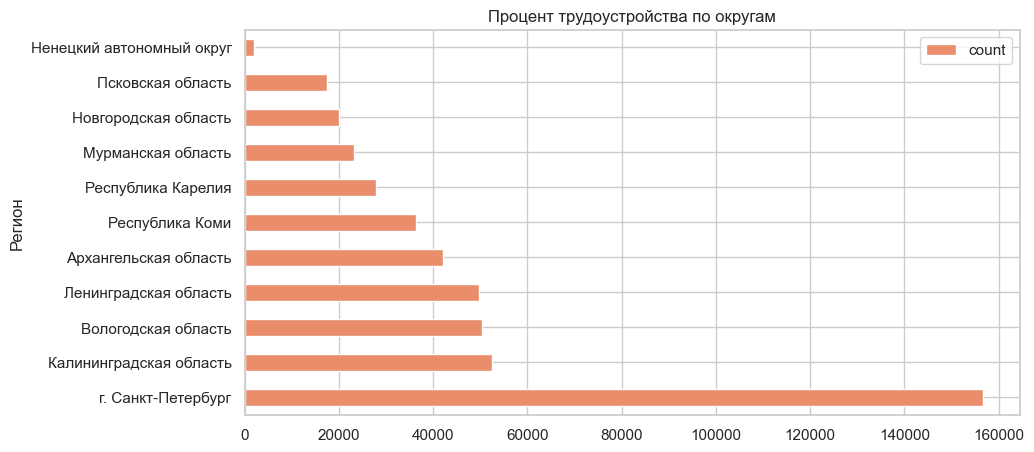

In [60]:
df_2020_sz.plot(kind='barh', y='count', x='region', title='Процент трудоустройства по округам', ylabel='Количество', xlabel='Регион')

Как и ожидалось, по Северо-Западному региону чаще всего люди обращались в Санкт-Петербурге. 

In [61]:
#6.6 
#посчитем сколько всего обратилось 
df_all = df_2020.pivot_table(index='district', aggfunc='sum', values='count').sort_values(by='district', ascending=True).reset_index()
df_all.columns = ['district', 'all_count']
df_all

,district,all_count
0,Дальневосточный федеральный округ,289224
1,Приволжский федеральный округ,1048536
2,Северо-Западный федеральный округ,477798
3,Северо-Кавказский федеральный округ,701329
4,Сибирский федеральный округ,718075
5,Уральский федеральный округ,461223
6,Центральный федеральный округ,1029581
7,Южный федеральный округ,595894


In [62]:
#посчитаем сколько нашли работу после обращения в службу занятости 
df_find = df_2020.query('find_new_job == True')
df_find = df_find.pivot_table(index='district', aggfunc='sum', values='count').sort_values(by='district', ascending=True).reset_index()
df_find.columns = ['district', 'find_count']
df_find

,district,find_count
0,Дальневосточный федеральный округ,54219
1,Приволжский федеральный округ,251729
2,Северо-Западный федеральный округ,105280
3,Северо-Кавказский федеральный округ,40359
4,Сибирский федеральный округ,182080
5,Уральский федеральный округ,92800
6,Центральный федеральный округ,261956
7,Южный федеральный округ,108717


In [65]:
#добавим столбец с процентом трудоустройства
df_all['find_count'] = df_find['find_count']
df_all['perc_employment'] = round((df_all['find_count'] / df_all['all_count']) * 100, 2)
df_all = df_all.sort_values(by='perc_employment', ascending=False)
df_all

,district,all_count,find_count,perc_employment
6,Центральный федеральный округ,1029581,261956,25.44
4,Сибирский федеральный округ,718075,182080,25.36
1,Приволжский федеральный округ,1048536,251729,24.01
2,Северо-Западный федеральный округ,477798,105280,22.03
5,Уральский федеральный округ,461223,92800,20.12
0,Дальневосточный федеральный округ,289224,54219,18.75
7,Южный федеральный округ,595894,108717,18.24
3,Северо-Кавказский федеральный округ,701329,40359,5.75


<AxesSubplot:title={'center':'Процент трудоустройства по округам'}, ylabel='Округ'>

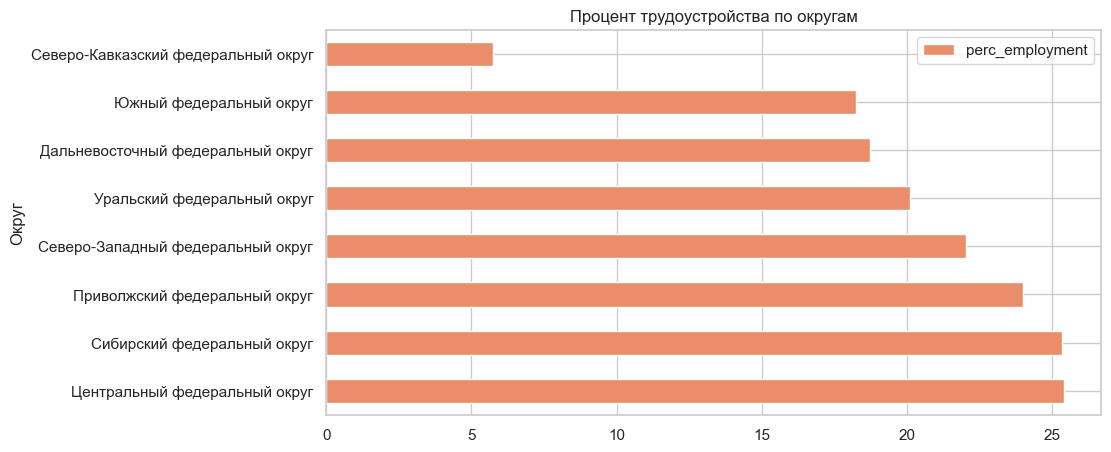

In [66]:
df_all.plot(kind='barh', y='perc_employment', x='district', title='Процент трудоустройства по округам', ylabel='Процент', xlabel='Округ')

Наибольший процент трудоустройства в Центральном округе (25,44%), а наименьший в Северо-Кавказском (5,75%)

In [67]:
#6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле
list_district = list(df_2020['district'].unique())
empl = []
per = []
for i in list_district:
    df_region = df_2020.query('district == @i')
    list_region = list(df_region['region'].unique())
    for j in list_region:
        find_job = df_region.query('find_new_job == True & region == @j')['count'].sum()
        empl.append(find_job)
        alls = df_region.query('region == @j')['count'].sum()
        per_find = round((find_job /  alls) * 100, 2)
        per.append(per_find)


In [68]:
df_dist_reg = df.pivot_table(index=['district', 'region'], aggfunc='sum',values='count')
df_dist_reg

count
district                          region                              
Дальневосточный федеральный округ Амурская область               91096
                                  Еврейская автономная область   14933
                                  Забайкальский край            106909
                                  Камчатский край                24390
                                  Магаданская область            11465
...                                                                ...
Южный федеральный округ           Республика Адыгея (Адыгея)     30243
                                  Республика Калмыкия            28835
                                  Республика Крым               108902
                                  Ростовская область            292438
                                  г. Севастополь                  9767

[85 rows x 1 columns]

In [69]:
df_dist_reg['find_job'] = empl
df_dist_reg['perc_find_job'] = per

In [70]:
df_dist_reg

count  \
district                          region                                 
Дальневосточный федеральный округ Амурская область               91096   
                                  Еврейская автономная область   14933   
                                  Забайкальский край            106909   
                                  Камчатский край                24390   
                                  Магаданская область            11465   
...                                                                ...   
Южный федеральный округ           Республика Адыгея (Адыгея)     30243   
                                  Республика Калмыкия            28835   
                                  Республика Крым               108902   
                                  Ростовская область            292438   
                                  г. Севастополь                  9767   

                                                                find_job  \
district                          region                                   
Дальневосточный федеральный округ Амурская область                  7345   
                                  Еврейская автономная область      1500   
                                  Забайкальский край                9102   
                                  Камчатский край                   1840   
                                  Магаданская область                711   
...                                                                  ...   
Южный федеральный округ           Республика Адыгея (Адыгея)       34581   
                                  Республика Калмыкия               2676   
                                  Республика Крым                   1881   
                                  Ростовская область               11921   
                                  г. Севастополь                   30736   

                                                                perc_find_job  
district                          region                                       
Дальневосточный федеральный округ Амурская область                      23.72  
                                  Еврейская автономная область          22.95  
                                  Забайкальский край                    17.04  
                                  Камчатский край                       26.23  
                                  Магаданская область                   20.01  
...                                                                       ...  
Южный федеральный округ           Республика Адыгея (Адыгея)            17.46  
                                  Республика Калмыкия                   14.73  
                                  Республика Крым                       13.48  
                                  Ростовская область                    16.68  
                                  г. Севастополь                        18.89  

[85 rows x 3 columns]

In [71]:
df_dist_reg.sort_values(by='perc_find_job', ascending=False)

count  \
district                            region                                        
Центральный федеральный округ       Белгородская область                  65480   
Приволжский федеральный округ       Пензенская область                    80388   
Дальневосточный федеральный округ   Сахалинская область                   22969   
Центральный федеральный округ       Московская область                   333194   
Сибирский федеральный округ         Новосибирская область                233350   
...                                                                         ...   
Северо-Кавказский федеральный округ Республика Дагестан                  307904   
                                    Чеченская Республика                 397021   
                                    Республика Северная Осетия - Алания   75170   
                                    Кабардино-Балкарская Республика      121988   
                                    Республика Ингушетия                 117948   

                                                                         find_job  \
district                            region                                          
Центральный федеральный округ       Белгородская область                    13147   
Приволжский федеральный округ       Пензенская область                      21356   
Дальневосточный федеральный округ   Сахалинская область                      2273   
Центральный федеральный округ       Московская область                       5833   
Сибирский федеральный округ         Новосибирская область                   38096   
...                                                                           ...   
Северо-Кавказский федеральный округ Республика Дагестан                      9340   
                                    Чеченская Республика                    11193   
                                    Республика Северная Осетия - Алания      1128   
                                    Кабардино-Балкарская Республика          2186   
                                    Республика Ингушетия                       51   

                                                                         perc_find_job  
district                            region                                              
Центральный федеральный округ       Белгородская область                         44.93  
Приволжский федеральный округ       Пензенская область                           44.25  
Дальневосточный федеральный округ   Сахалинская область                          35.34  
Центральный федеральный округ       Московская область                           33.40  
Сибирский федеральный округ         Новосибирская область                        31.83  
...                                                                                ...  
Северо-Кавказский федеральный округ Республика Дагестан                           5.46  
                                    Чеченская Республика                          4.99  
                                    Республика Северная Осетия - Алания           3.54  
                                    Кабардино-Балкарская Республика               2.77  
                                    Республика Ингушетия                          0.08  

[85 rows x 3 columns]

Наибольший процент трудоустройства в Белгородской области в Центральном федеральном округе (44,93%)